# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *11장 차원, 잠재표현, 그리고 오토인코더*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### LAB 11-1 3차원 공간의 데이터에서 주성분을 찾아오자


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 축 생성
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

# 1000개의 데이터 셋 생성하기 (축을 기준으로 약간의 잡음을 더하여 생성)
n_data = 1000
X = []
for _ in range(n_data) :
    r_coeff = np.random.randn(2,)
    data = 2.0* r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)              # bias는 범주 내 random number로 선정
    X.append(data)

X = np.array(X)

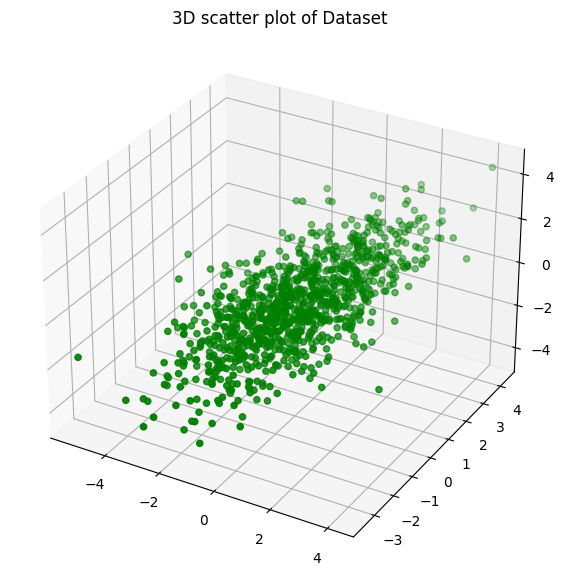

In [ ]:
# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# 3차원 공간에 데이터 가시화
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()

In [ ]:
X_adj = X - X.mean(axis = 0)        # 평균을 빼서 데이터 중심을 원점으로 옮김
U, S, Vt = np.linalg.svd(X_adj)     # 특이값 분해를 실행함
Vt.T                                # 주성분을 담고 있는 행렬 (전치 행렬이기 때문에 열별로 하나의 주성분을 의미)

array([[-0.55467608,  0.72497331, -0.40834807],
       [-0.57726985,  0.01814945,  0.81635171],
       [-0.5992445 , -0.68853779, -0.40843817]])

In [ ]:
S                                   # 각각의 주성분에 대한 표준편차
                                    # (분산이 표준편차의 제곱이기때문에 표준편차가 클수록 분산 또한 크다 -> 주성분)

array([67.08882386, 30.75719478,  0.93442872])

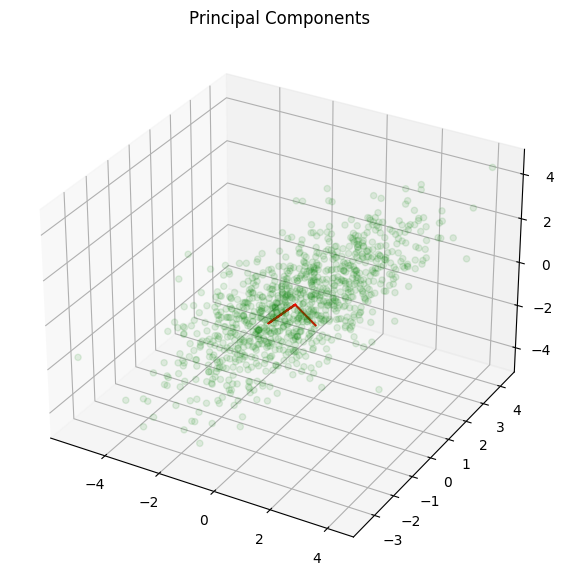

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green", alpha=0.1)
plt.title("Principal Components")
origin = np.zeros((1,3))

# 주성분을 나타내는 벡터를 그리기 위한 좌표 생성
C = np.concatenate( (origin, Vt[0, :].reshape(-1,3),
                    origin, Vt[1, :].reshape(-1,3)), axis =0)

# 주성분 그리기
ax.plot3D(C[:,0], C[:,1], C[:,2], color = "red")
plt.show()

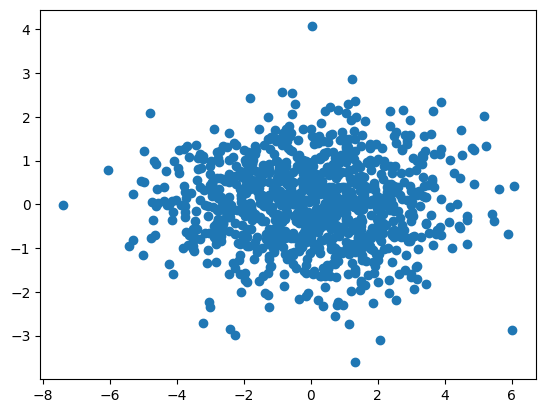

In [ ]:
# 데이터 압축 진행 (특이값 분해)

W_2d = Vt.T[:, :2]
X_2d = X_adj.dot(W_2d)

plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.show()

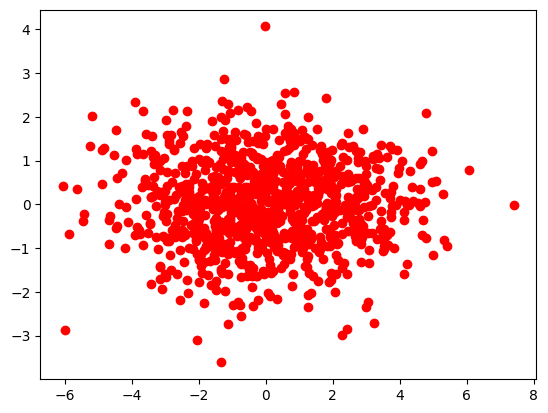

In [ ]:
from sklearn.decomposition import PCA

# 데이터 압축 진행 (고유값 분해)
pca = PCA(n_components = 2)
X_2d_sklearn = pca.fit_transform(X)

plt.scatter(X_2d_sklearn[:, 0], X_2d_sklearn[:, 1], color='r')
plt.show()

### 11.5 커널 PCA

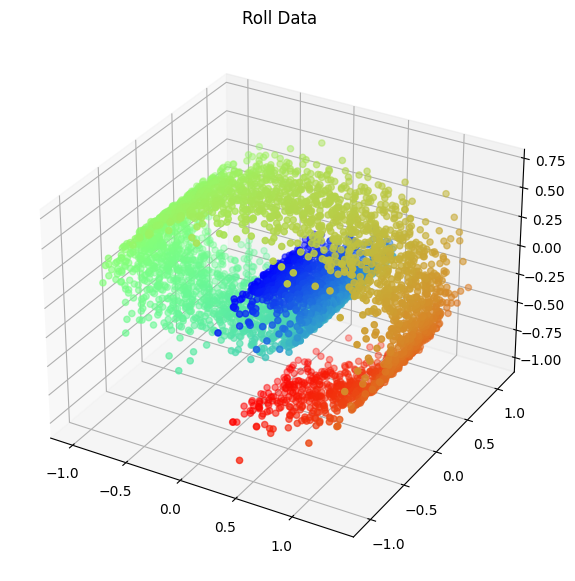

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def make_a_roll(num_data) :   # 말린 형태의 3차원 점 데이터 집합을 만듦
   f = 3
   unit_length = np.linspace(0, 1, num_data)
   t = f * unit_length * 3.14
   x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
   z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
   y = + np.random.randn(num_data)*0.3
   r = unit_length
   g = -(2*(unit_length-0.5))**2 + 1
   b = 1-unit_length
   X = np.array( [x, y, z])
   C = np.array( [r, g, b])
   return X.T, C.T

X, color = make_a_roll(5000)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = color)
plt.title("Roll Data")
plt.show()

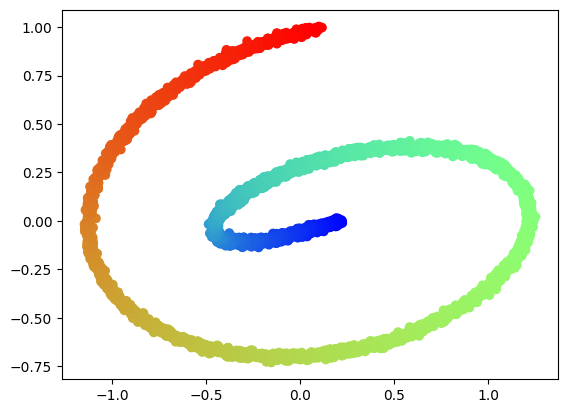

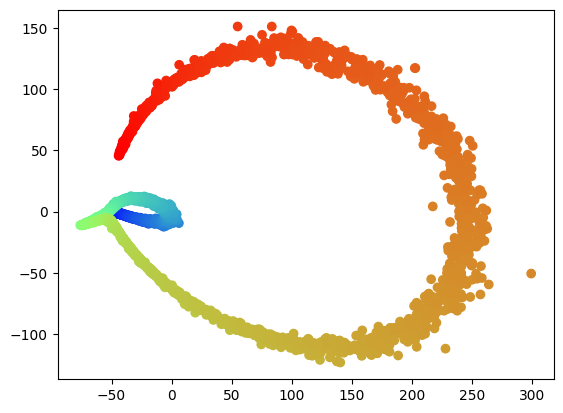

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 2)
X_2d = pca.fit_transform(X)

kernel_pca = KernelPCA(n_components = 2, kernel='poly', gamma = 3.5, degree = 5, coef0 = 3.5)
X_2d_kernel = kernel_pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], color=color)
plt.show()
plt.scatter(X_2d_kernel[:, 0], X_2d_kernel[:, 1], color=color)
plt.show()

### 11.6 다양한 커널의 적용

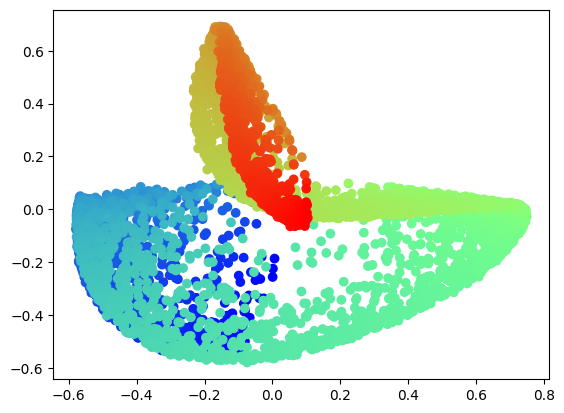

In [ ]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components = 2, kernel='rbf', gamma = 2.2)
X_2d = kernel_pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], color=color)
plt.show()

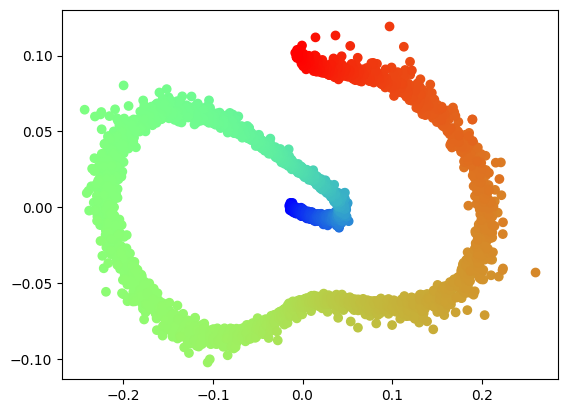

In [ ]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components = 2, kernel='sigmoid', gamma = 1.1, coef0 = 3.0)
X_2d = kernel_pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], color=color)
plt.show()

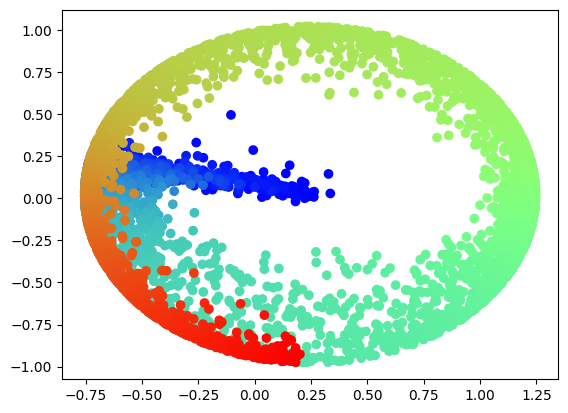

In [ ]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components = 2, kernel='cosine')
X_2d = kernel_pca.fit_transform(X)

plt.scatter(X_2d[:, 0], X_2d[:, 1], color=color)
plt.show()

### LAB 11-2 주성분을 추출해 이미지를 압축해 보자

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분해 받자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, test_images.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

<Figure size 640x480 with 0 Axes>

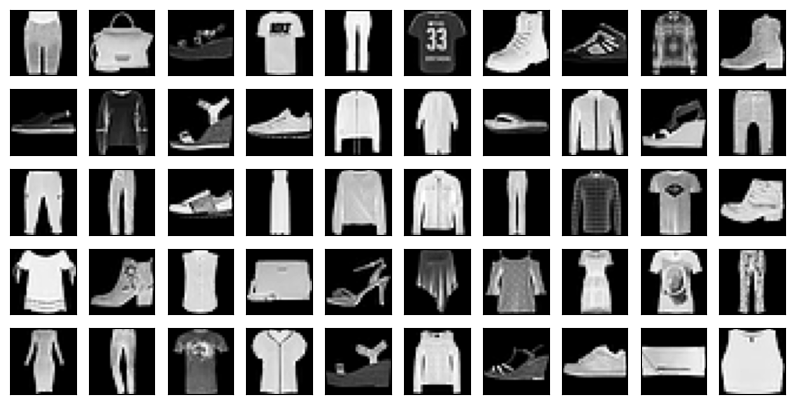

In [ ]:
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

In [ ]:
from sklearn.decomposition import PCA

train_images_flat = train_images.reshape(-1, 28*28)             # flatting

pca = PCA(n_components = 100)
train_reduced = pca.fit_transform(train_images_flat)

<Figure size 640x480 with 0 Axes>

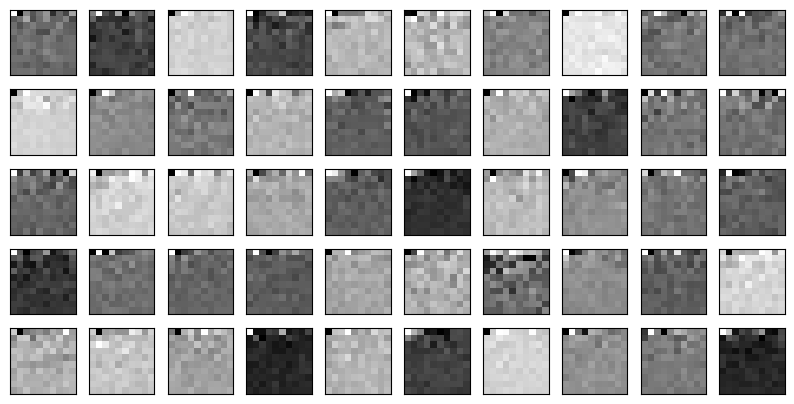

In [ ]:
reduced_images = train_reduced.reshape(-1, 10, 10)              # 10x10 크기로 reshape

plot_images(5, 10, reduced_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

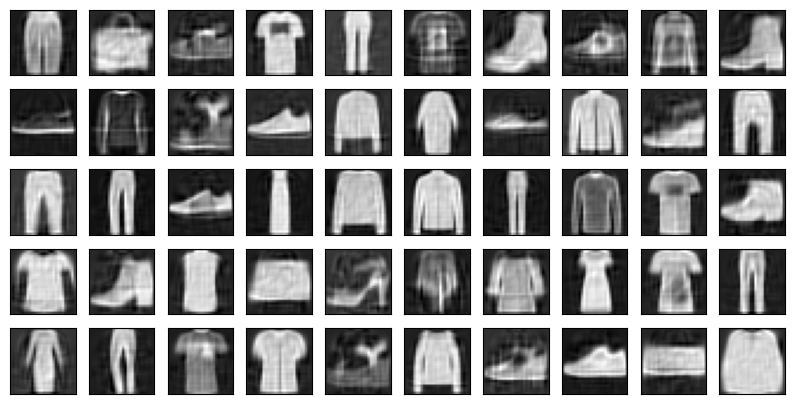

In [ ]:
recovered_images = pca.inverse_transform(train_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)         # 28x28 크기로 reshape

plot_images(5, 10, recovered_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

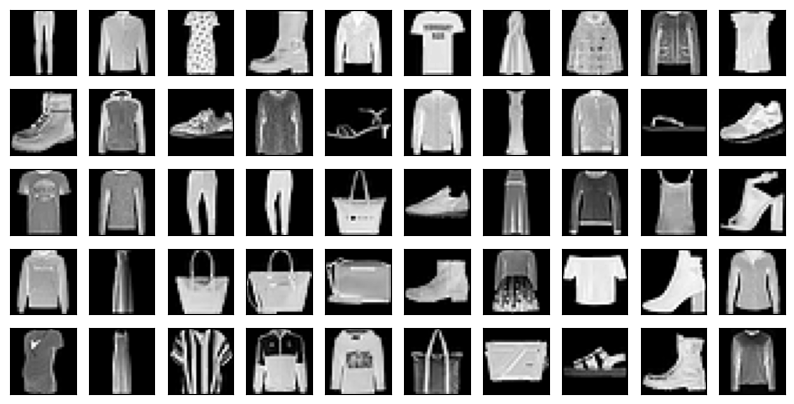

In [ ]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]

plot_images(5, 10, samples)

<Figure size 640x480 with 0 Axes>

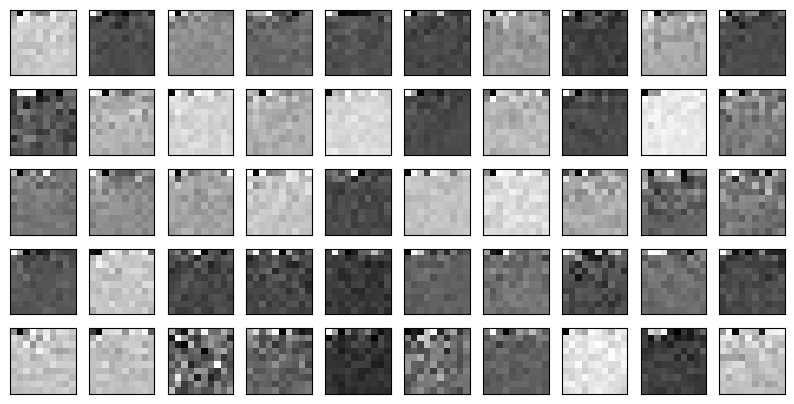

In [ ]:
test_images_flat = test_images.reshape(-1, 28*28)
test_reduced = pca.fit_transform(test_images_flat)

reduced_images = test_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

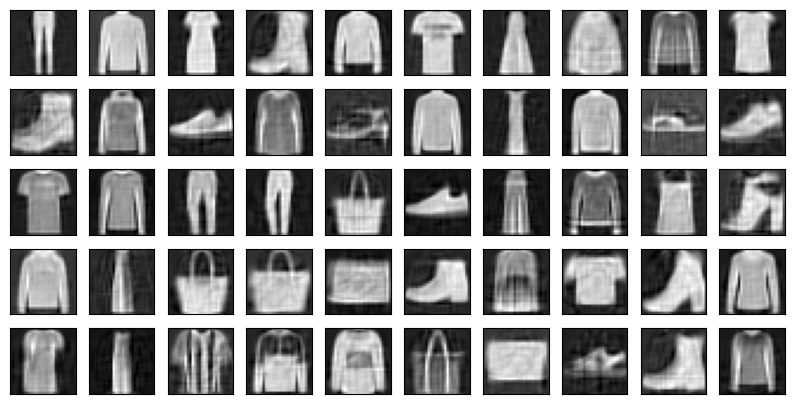

In [ ]:
recovered_images = pca.inverse_transform(test_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)

plot_images(5, 10, recovered_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

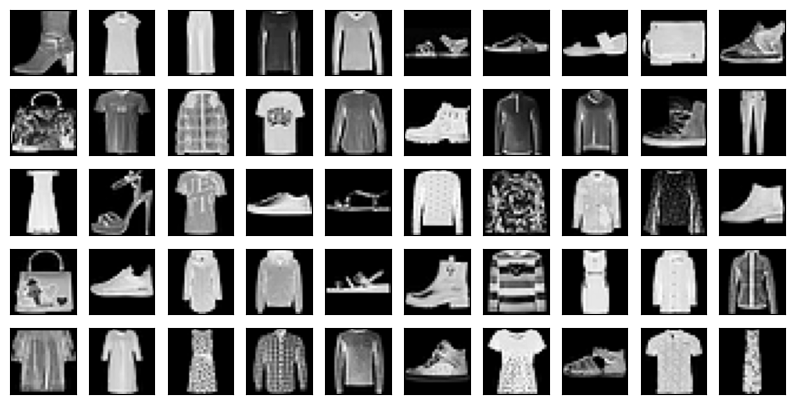

<Figure size 640x480 with 0 Axes>

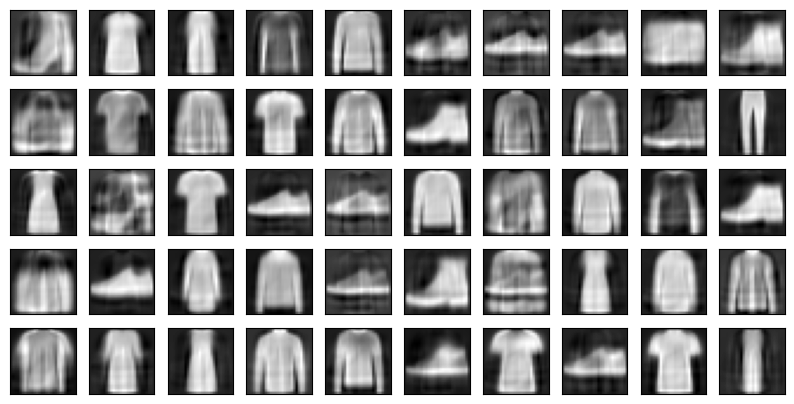

In [ ]:
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 25)

train_reduced = pca.fit_transform(train_images_flat)
recovered_images = pca.inverse_transform(train_reduced)

recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx+50])

### LAB 11-3 LLE를 넘파이로만 구현해 보자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # 롤 데이터 생성하기
    X = []
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

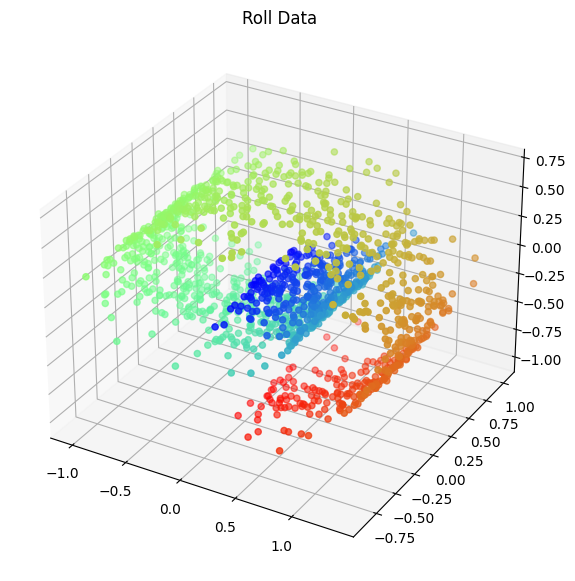

In [ ]:
m = 1500
X, color = make_a_roll(m)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = color)
plt.title("Roll Data")
plt.show()

In [ ]:
W = np.zeros((m, m))

# Find k-nearest neighbors
k = 7
for i in range(m):
    Z = X-X[i,:]
    d_vec = (Z**2).sum(axis = 1)
    neigh = np.argsort(d_vec)[1:k+1]

    Zi = np.matrix(Z[neigh, :]) # k x n
    Gi = Zi.dot(Zi.T) # k x k : nearly singular
    correction = np.trace(Gi) * 1e-2 # correction
    Gi = Gi + np.eye(k)*correction

    Gi_inv = np.linalg.inv(Gi)
    wi = Gi_inv.dot(np.ones(k, ))
    wi /= wi.sum()

    W[i,neigh] = wi

In [ ]:
I = np.eye(m)
U,sig,Vt = np.linalg.svd(I - W)
Y = Vt.T

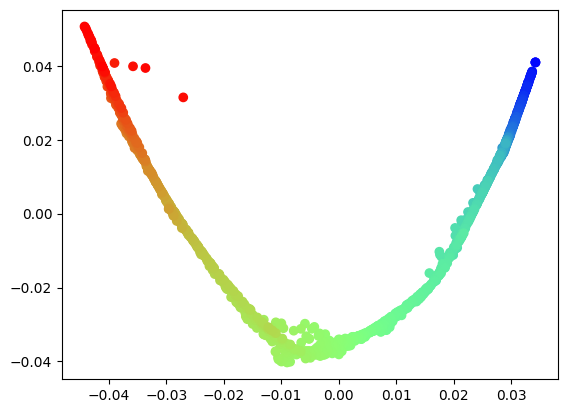

In [ ]:
plt.scatter(Y[:, -2], Y[:, -3], color=color)
plt.show()

### LAB 11-4 매니폴드 학습을 이용한 차원 축소 실습

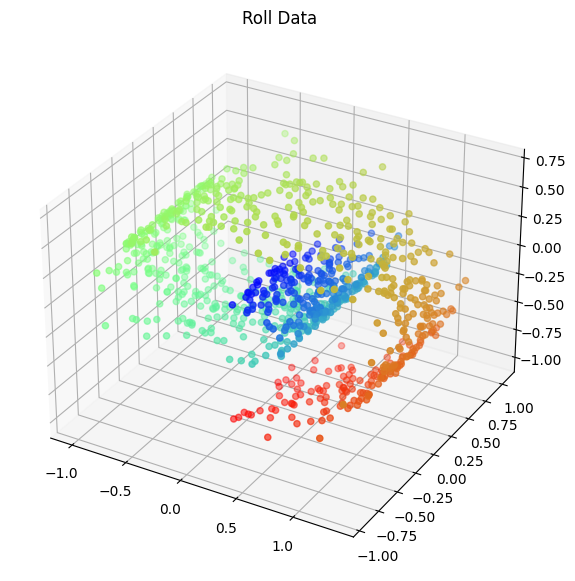

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # 롤 데이터 생성
    X = []
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

n_points = 1000
X, color = make_a_roll(n_points)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = color)
plt.title("Roll Data")
plt.show()

In [ ]:
from sklearn import manifold

methods= {}
methods['LLE'] = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2)
methods['Isomap'] = manifold.Isomap(n_neighbors=10, n_components=2)
methods['t-SNE'] = manifold.TSNE(n_components=2)

In [ ]:
embeddings = {}
for _, (name, model) in enumerate(methods.items()):
    embeddings[name] = model.fit_transform(X)

<Figure size 640x480 with 0 Axes>

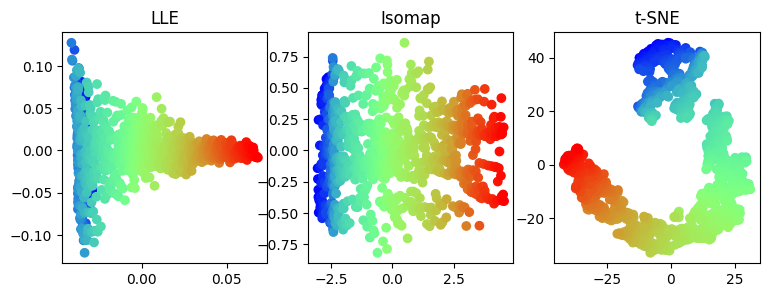

In [ ]:
# 1 x N(methods) 서브플롯 준비
fig = plt.figure()
fig.suptitle("Manifold Learning", fontsize=14)
fig, ax = plt.subplots(1, len(methods), figsize = (len(methods)*3,3))

# 임베딩 결과 그리기
for i, (name, method) in enumerate(methods.items()):
    ax[i].scatter(embeddings[name][:, 0], embeddings[name][:, 1], c=color)
    ax[i].set_title(name)
plt.show()